# Evaluation of IC and MPC


Evaluation of data acquired from control cascade in simulator PyBullet

        if ref_type == "spiral":
            REFERENCE = ReferenceTrajectory(curve=ref_type, space = [1.8, 1.0, 1.0], tscale = 0.4)
        else:
            REFERENCE = ReferenceTrajectory(curve=ref_type, space = [1.8, 1.5, 1.0], tscale = 0.4)


## Imports and Loading Data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import tikzplotlib as tplt
from uav_params import UAVParams


In [4]:
# load model data
save_plots = True
noise = False
model_data_folder = "params"
models_file = ["lateral_crazyflie", "lateral_crazyflie", "altitude_crazyflie"]

# Load parameters of dynamics and cost function
models = []
for model_file in models_file:
    with open(model_data_folder+"/"+"ctrl_"+model_file+".pkl", 'rb') as infile:
        models.append(pickle.load(infile))

with open(model_data_folder+"/"+"ctrl_"+"attitude_crazyflie"+".pkl", 'rb') as infile:
    model_att = pickle.load(infile)
pass

# Load data from results folder
folder_results = 'results/3d_pybullet/'
folder_data = 'data/'
trajectories = ['spiral', 'figure8']
controllers = ['ic','eic','mpcmb']
data = {}
dt_data = {}
for trajectory in trajectories:
    for controller in controllers:
        # data = [state, ref, ctrl, cost, time]
        path = folder_results+folder_data+'log_controller_'+trajectory+'_'+controller
        if noise:
            path = folder_results+folder_data+'log_controller_'+trajectory+'_noise_'+controller
        data.setdefault(trajectory, {})[controller] = np.load(
            path+'.npy', allow_pickle=True)
        path_dt = folder_results+folder_data+'time_'+trajectory+'_'+controller
        if noise:
            path_dt = folder_results+folder_data+'time'+trajectory+'_'+controller+'_noise'
        dt_data.setdefault(trajectory, {})[controller] = np.load(
            path_dt+'.npy', allow_pickle=True)

# Set time vector
Nsim = data[trajectories[0]][controllers[0]][0].shape[2]
time = np.arange(0, models[0].dt*Nsim, models[0].dt)


## Distribution of Invariant Sets

Picture of set given by state constraints, invariant set of low gain controller, and high gain controller.

Order: y and z-axis controller


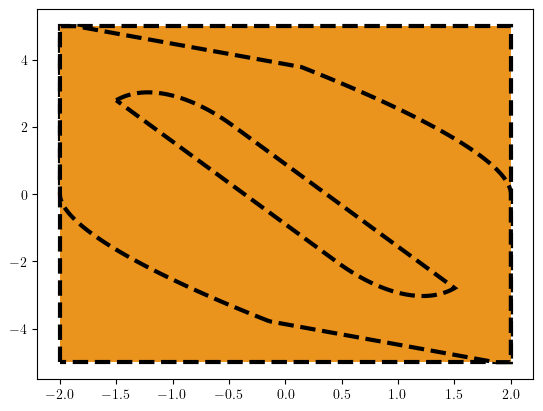

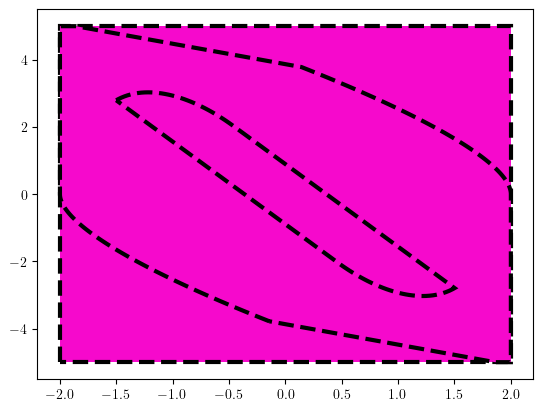

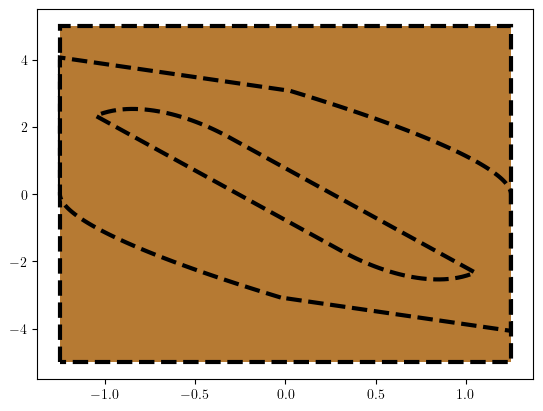

In [29]:
for model in models:
    model.plot_sets()

## Plots

### plot with reference and UAV position for spiral/ellipse and figure8 reference trajectory

In [3]:
def save_plot(path, noise = False):
    tplt.clean_figure()
    tplt.save(path+'.tex')
    if noise:
        path = path+'_noise'
    plt.legend()
    plt.savefig(path+'.pdf')
    plt.show()
    # plt.savefig(path+'.tex',format="pgf")

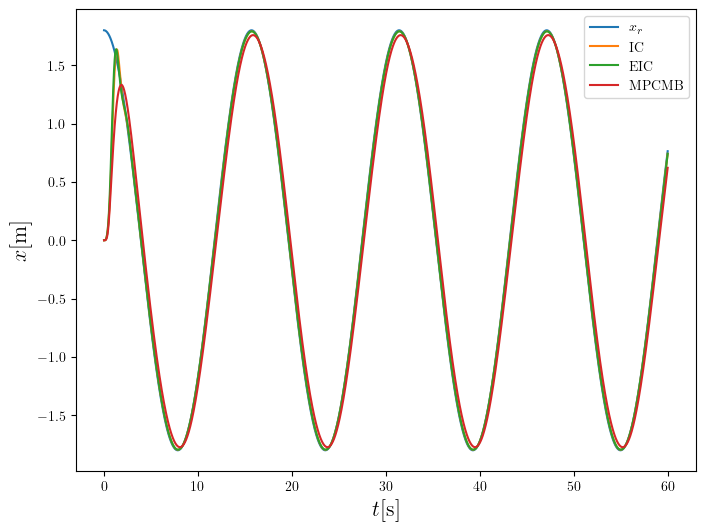

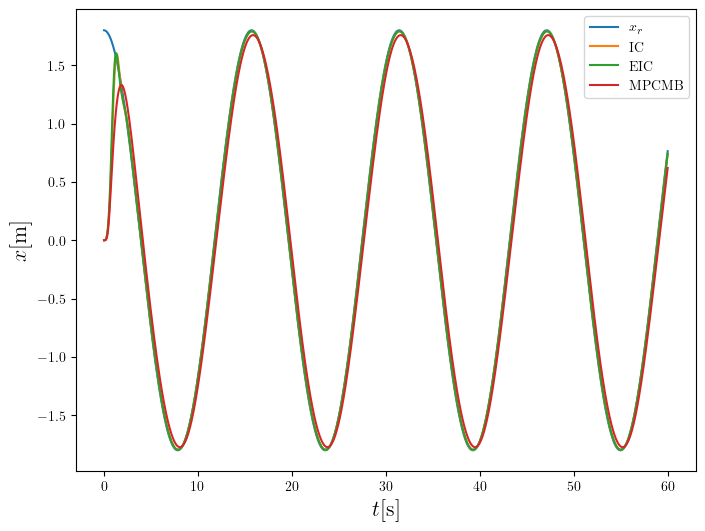

In [31]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(8, 6))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.plot(time, data[trajectory][controllers[0]][1][0, :], label=r'$x_r$')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,0, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$x\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/x_'+trajectory)
    else:
        plt.legend()
        plt.show()

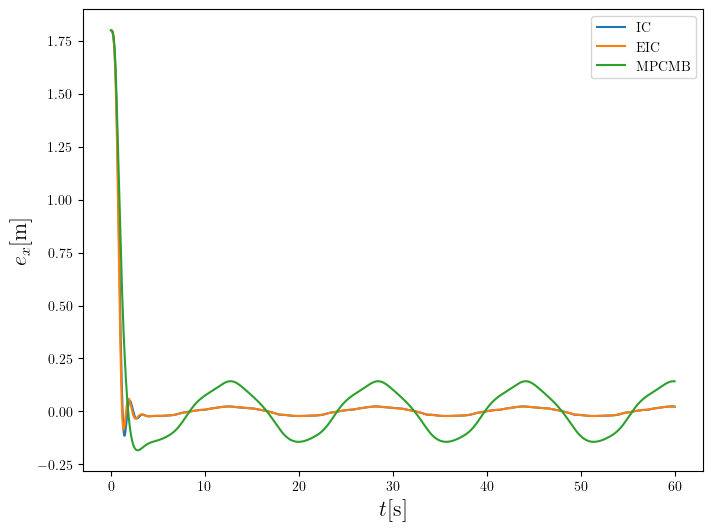

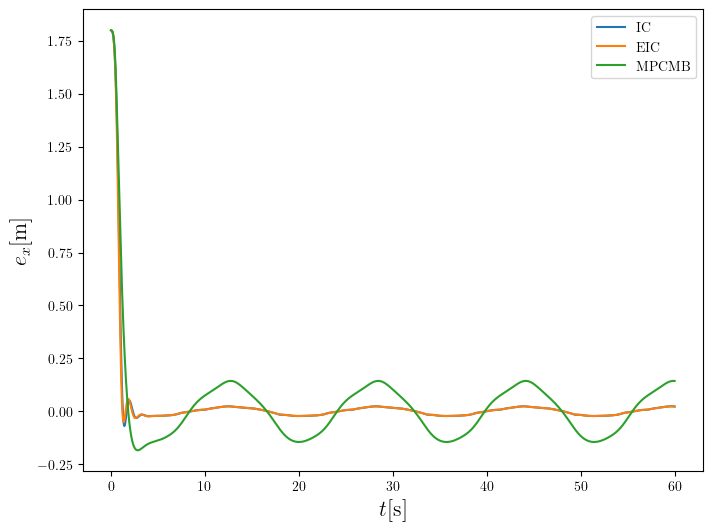

In [32]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(8, 6))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][0, :]-data[trajectory][controller][0][0,0, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$e_x\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/e_x_'+trajectory)
    else:
        plt.legend()
        plt.show()

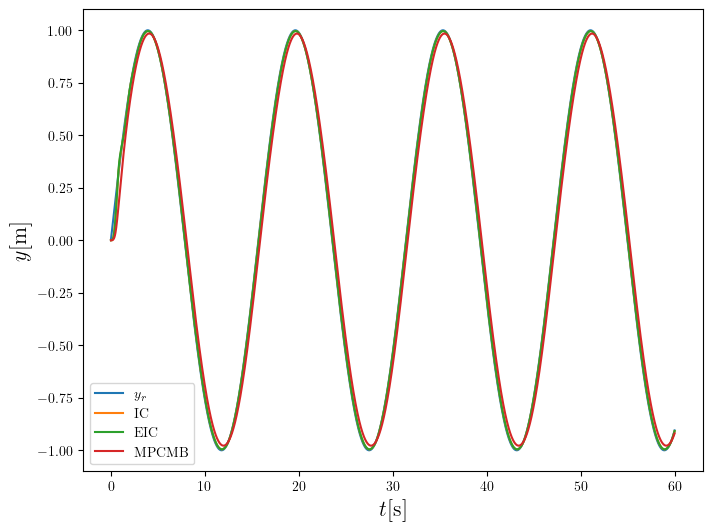

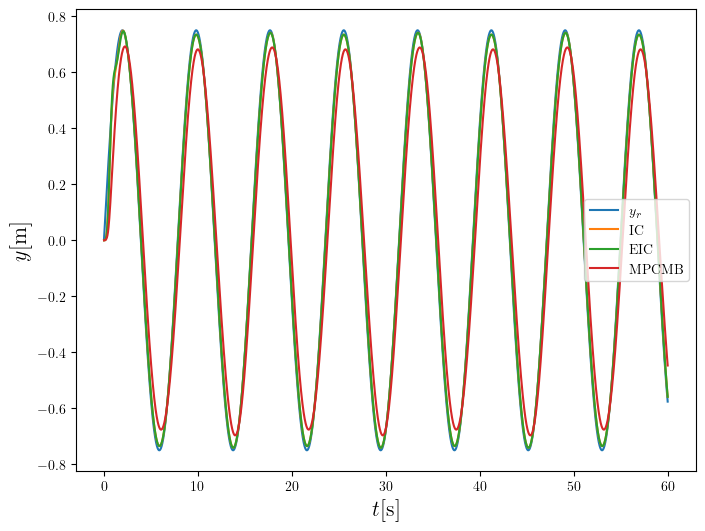

In [33]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(8, 6))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.plot(time, data[trajectory][controllers[0]][1][1, :], label=r'$y_r$')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,1, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$y\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/y_'+trajectory)
    else:
        plt.legend()
        plt.show()

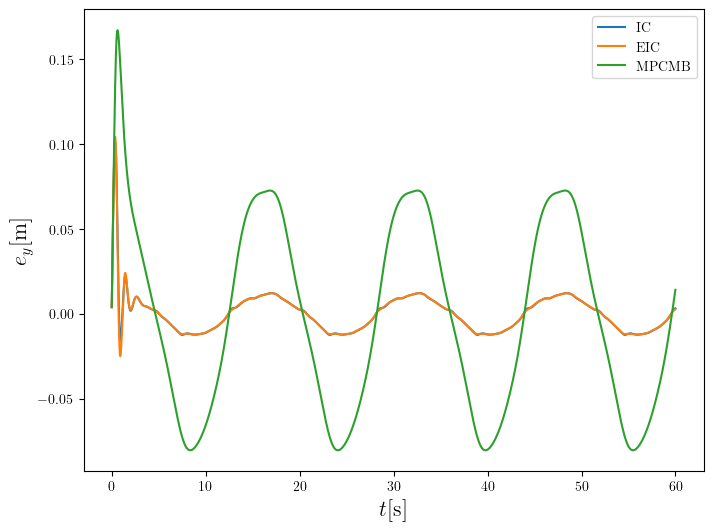

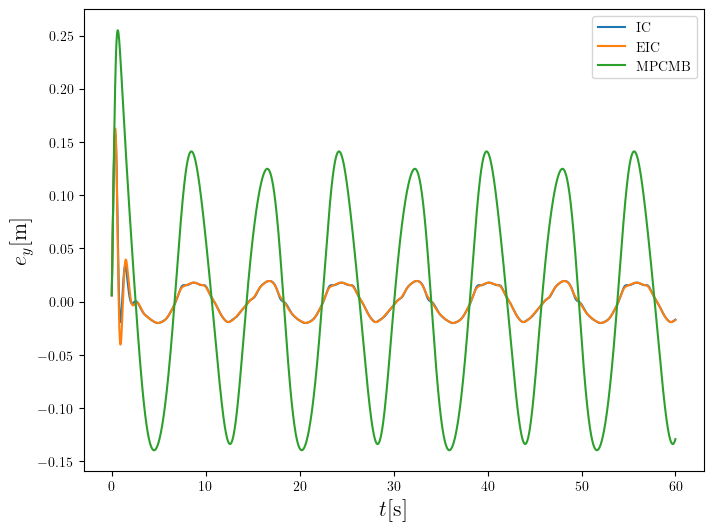

In [34]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(8, 6))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][1, :]-data[trajectory][controller][0][0,1, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$e_y\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/e_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

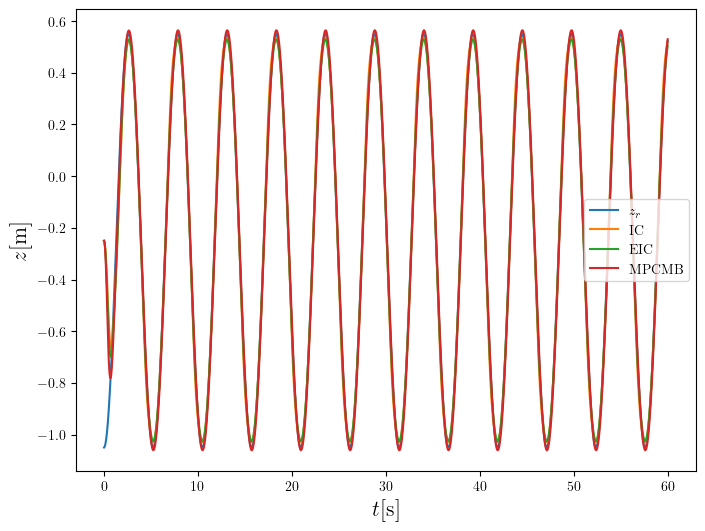

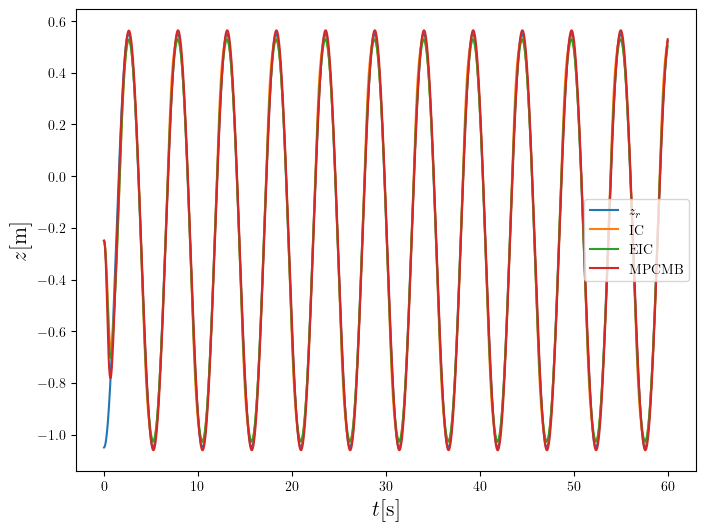

In [35]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(8, 6))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.plot(time, data[trajectory][controllers[0]][1][2, :], label=r'$z_r$')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,2, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$z\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/z_'+trajectory)
    else:
        plt.legend()
        plt.show()

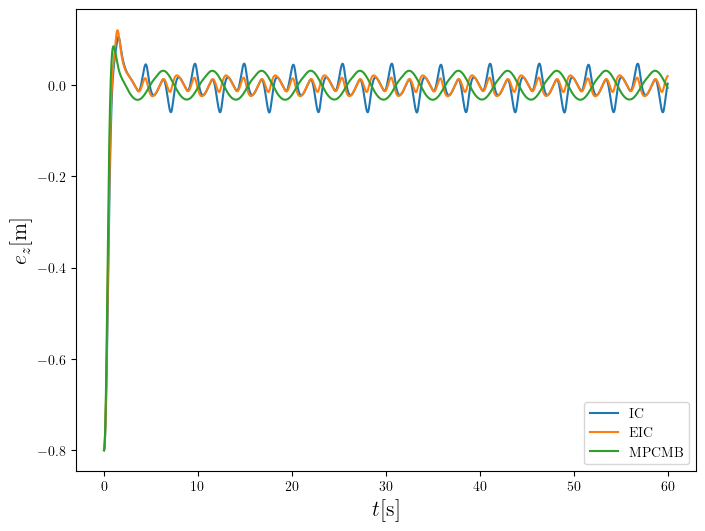

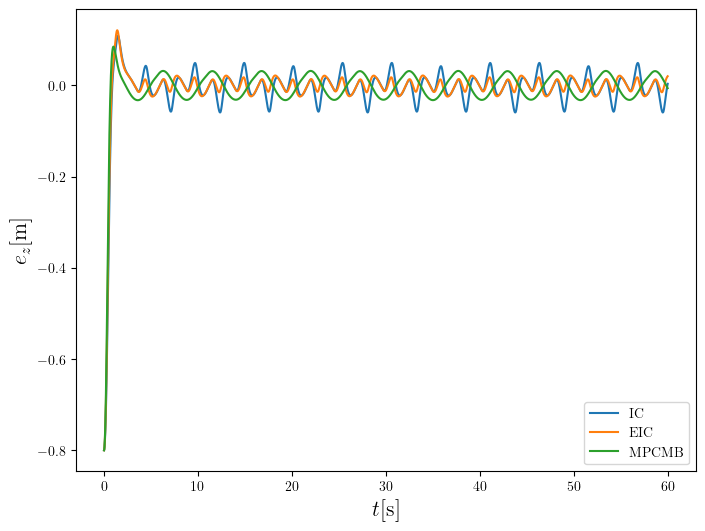

In [36]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(8, 6))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controllers[0]][1][2, :]-data[trajectory][controller][0][0,2, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$e_z\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/e_z_'+trajectory)
    else:
        plt.legend()
        plt.show()

### plot with UAV velocity for spiral/ellipse and figure8 reference trajectory

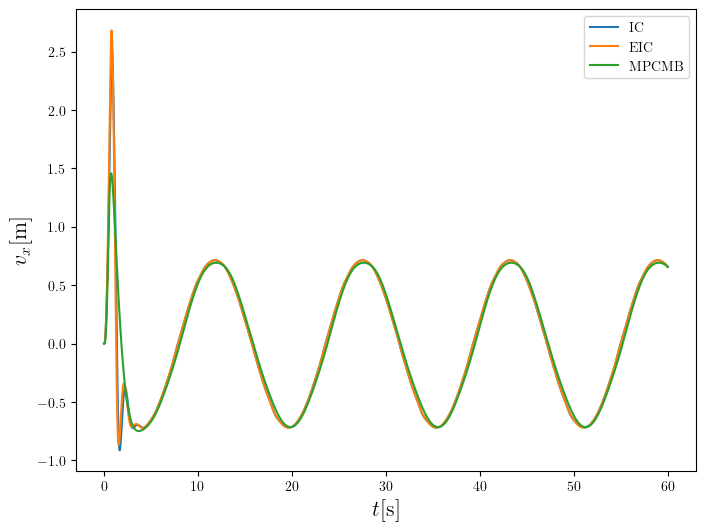

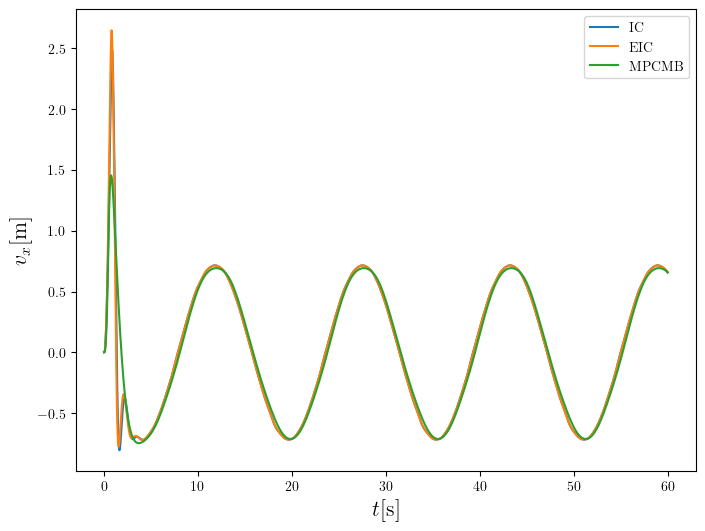

In [37]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(8, 6))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,6, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$v_x\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/vx_'+trajectory)
    else:
        plt.legend()
        plt.show()

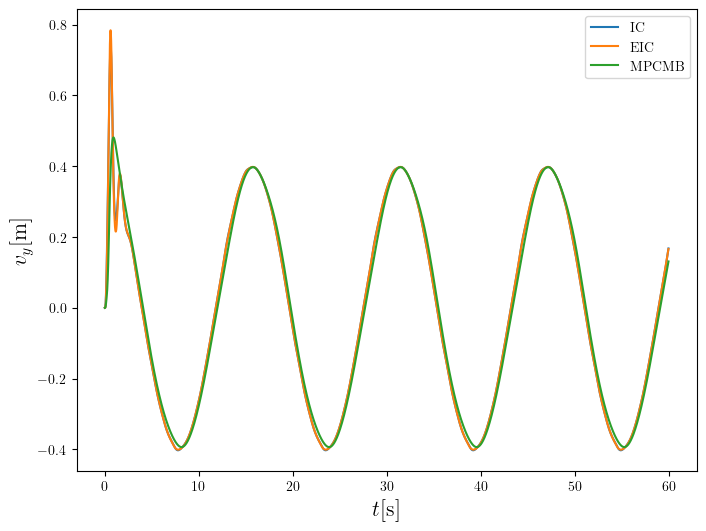

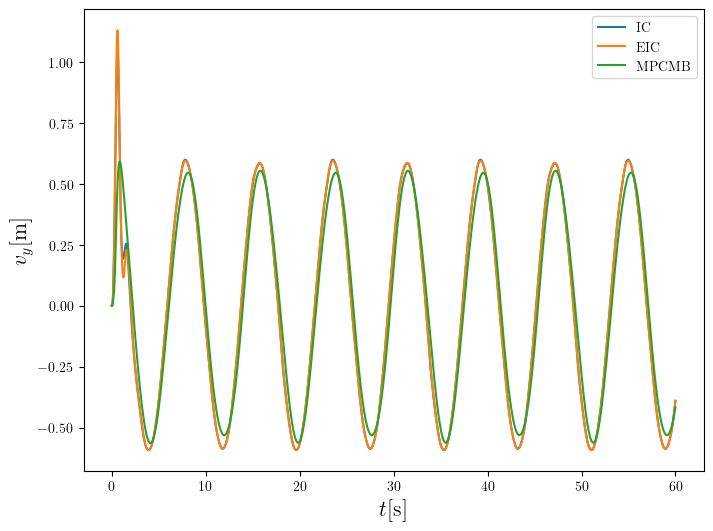

In [38]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(8, 6))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,7, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$v_y\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/vy_'+trajectory)
    else:
        plt.legend()
        plt.show()

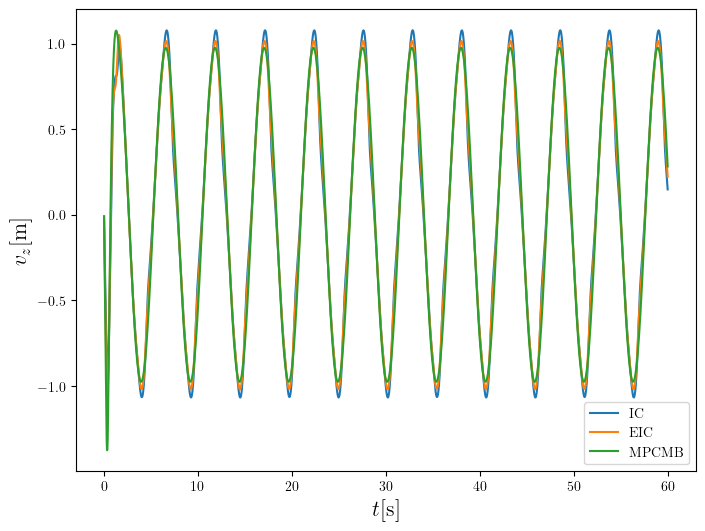

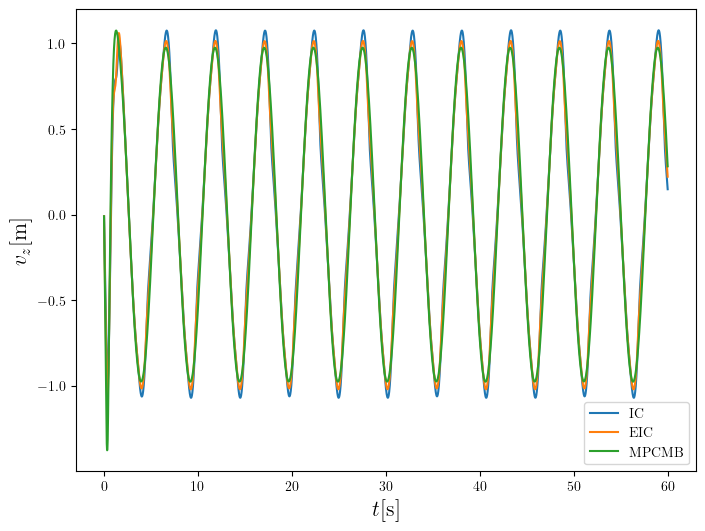

In [39]:
for trajectory in trajectories:
    fig = plt.figure(figsize=(8, 6))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    for i, controller in enumerate(controllers):
        plt.plot(time, data[trajectory][controller][0][0,8, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$v_z\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/vz_'+trajectory)
    else:
        plt.legend()
        plt.show()

### path of UAV for spiral/ellipse and figure8 reference trajectory

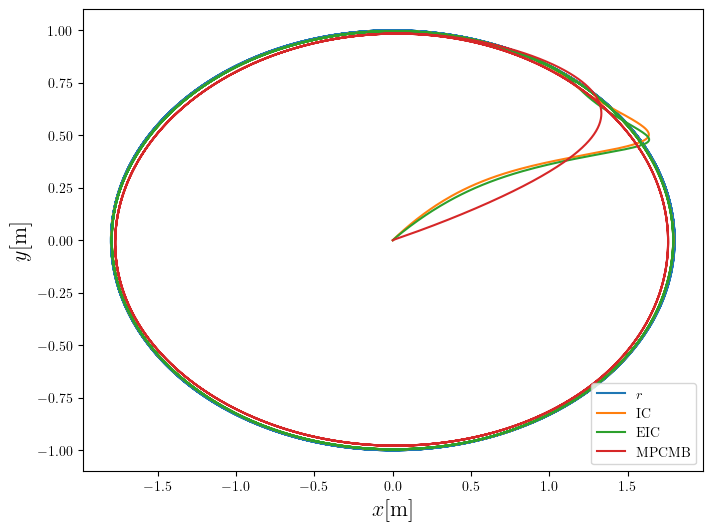

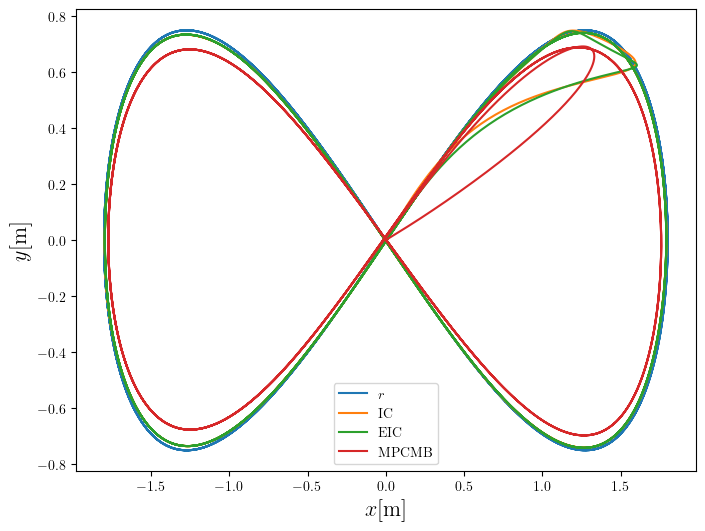

In [40]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    plt.plot(data[trajectory][controllers[0]][1][0, :],
             data[trajectory][controllers[0]][1][1, :], label='$r$')
    for controller in controllers:
        plt.plot(data[trajectory][controller][0][0, 0, :],
             data[trajectory][controller][0][0, 1, :], label=controller.upper())
    plt.xlabel(r'$x\mathrm{[m]}$', fontsize=16)
    plt.ylabel(r'$y\mathrm{[m]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/traj_xy_'+trajectory)
    else:
        plt.legend()
        plt.show()


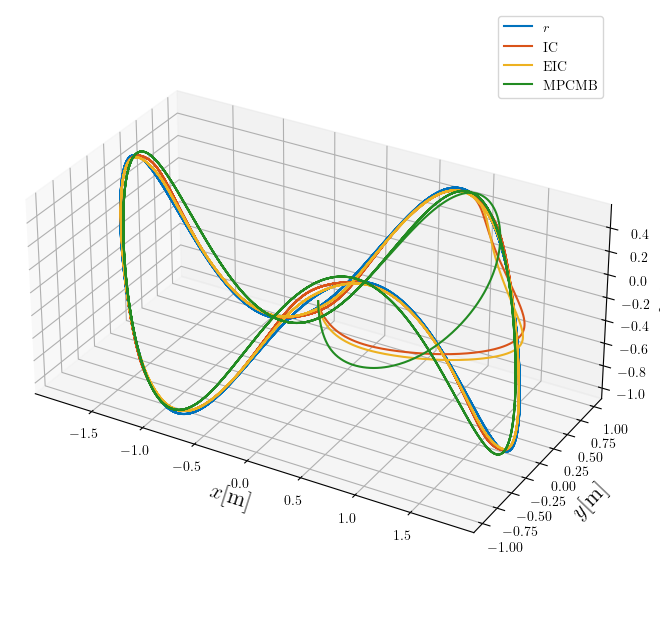

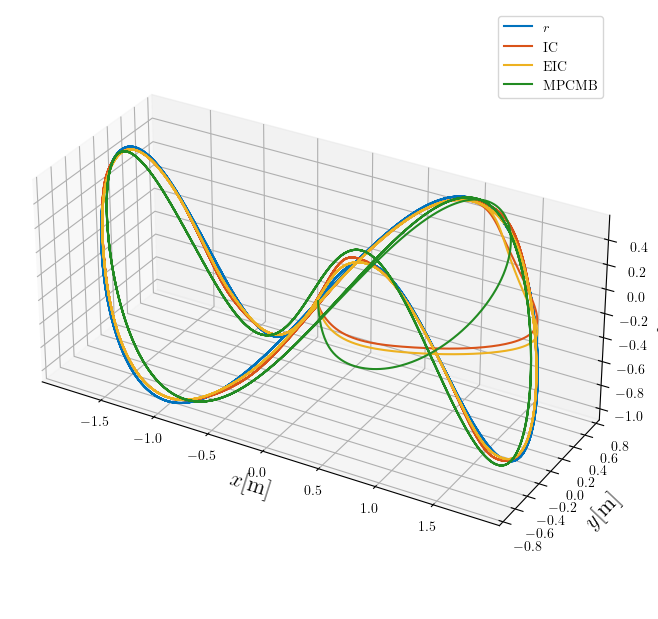

In [10]:
color_ref = (0.00000,0.44700,0.74100)
for trajectory in trajectories:
    colors = [(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500), (0.133333333,0.545098039,0.133333333)]
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.set_box_aspect((np.ptp(data[trajectory][controllers[0]][1][0, :]), np.ptp(data[trajectory][controllers[0]][1][1, :]), np.ptp(data[trajectory][controllers[0]][1][2, :])))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    # plt.figure(figsize=(8, 6))
    fig.set_figwidth(8)
    fig.set_figheight(6)
    ax.plot3D(data[trajectory][controllers[0]][1][0, :],
             data[trajectory][controllers[0]][1][1, :],data[trajectory][controllers[0]][1][2, :], label='$r$', color = color_ref)
    for controller, color in zip(controllers,colors):
        ax.plot3D(data[trajectory][controller][0][0, 0, :],
             data[trajectory][controller][0][0, 1, :], data[trajectory][controller][0][0, 2, :],label=controller.upper(), color = color)
    ax.set_xlabel(r'$x\mathrm{[m]}$', fontsize=16)
    ax.set_ylabel(r'$y\mathrm{[m]}$', fontsize=16)
    ax.set_zlabel(r'$z\mathrm{[m]}$', fontsize=16)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.legend()
    if save_plots:
        fig.savefig(folder_results+'plots/traj_xyz_'+trajectory+'.pdf')
        plt.legend()
        plt.show()
    else:
        plt.legend()
        plt.show()

### Ouput of controllers

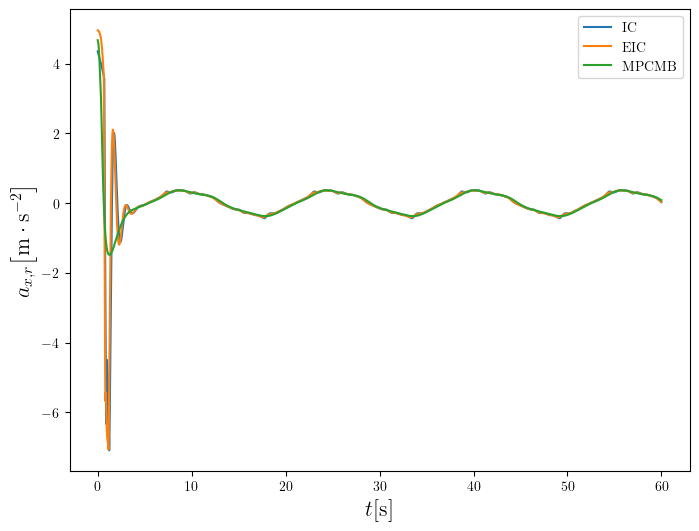

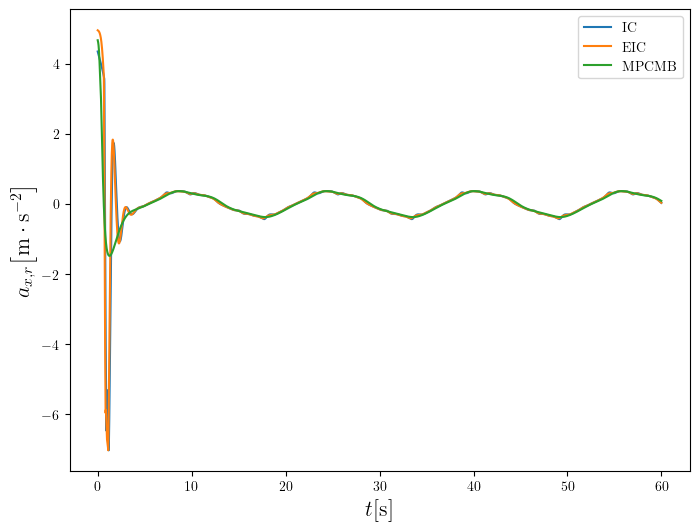

In [41]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    for controller in controllers:
        plt.plot(time, data[trajectory][controller][2][0, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$a_{x,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/acc_x_'+trajectory)
    else:
        plt.legend()
        plt.show()

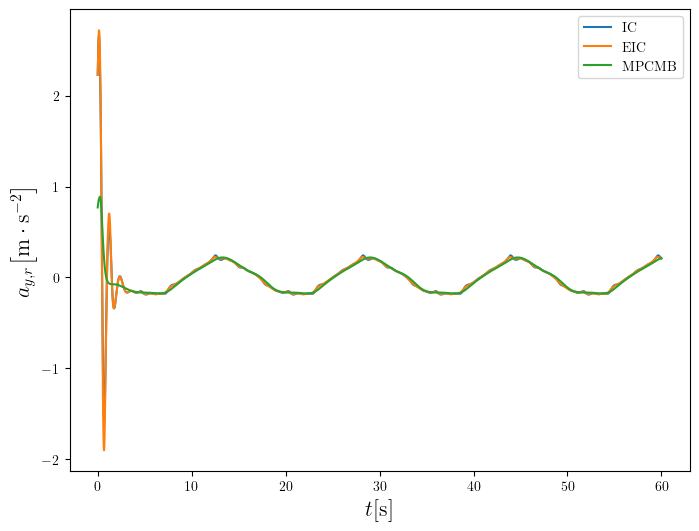

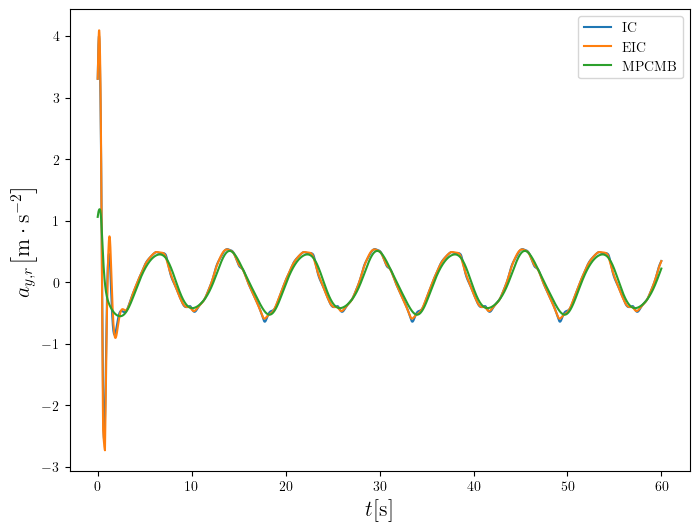

In [42]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    for controller in controllers:
        plt.plot(time, data[trajectory][controller][2][1, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$a_{y,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/acc_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Ouput of z-controllers in form of desired collective thrust

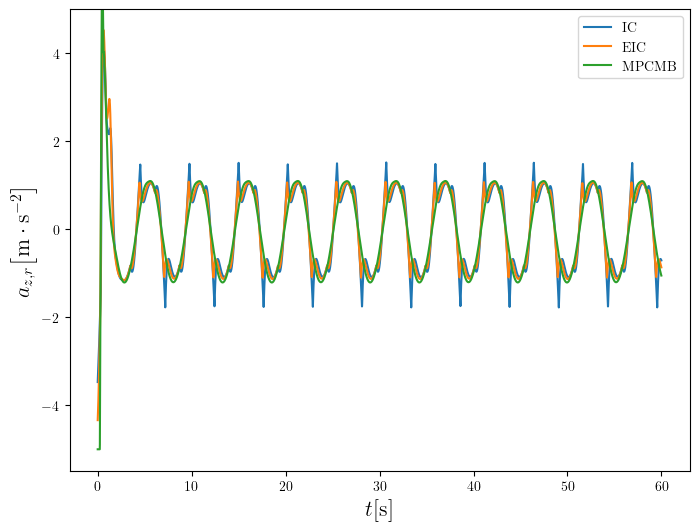

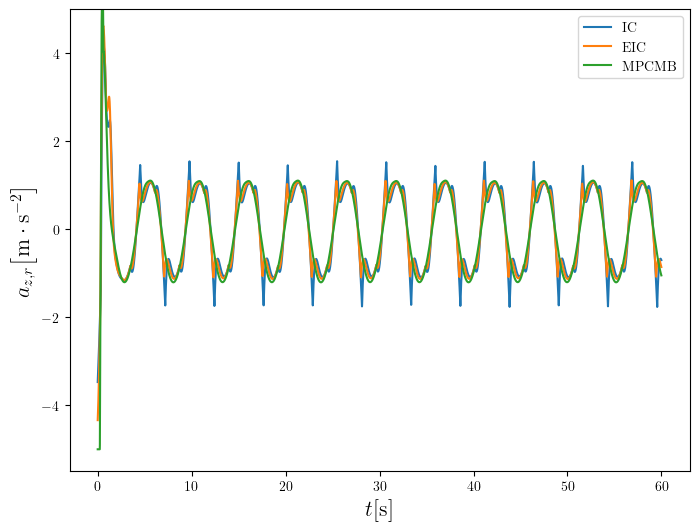

In [43]:
for trajectory in trajectories:
    # plot with control actions
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    for controller in controllers:
        plt.plot(time, data[trajectory][controller][2][2, :], label=controller.upper())
    plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
    plt.ylabel(r'$a_{z,r}\mathrm{\left[m\cdot s^{-2}\right]}$', fontsize=16)
    plt.ylim(top=5)
    if save_plots:
        save_plot(folder_results+'plots/acc_z_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Time needed to solve LP/QP

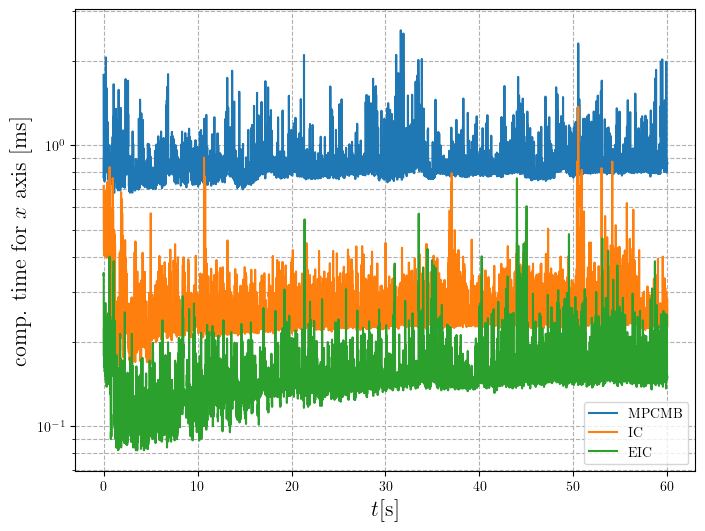

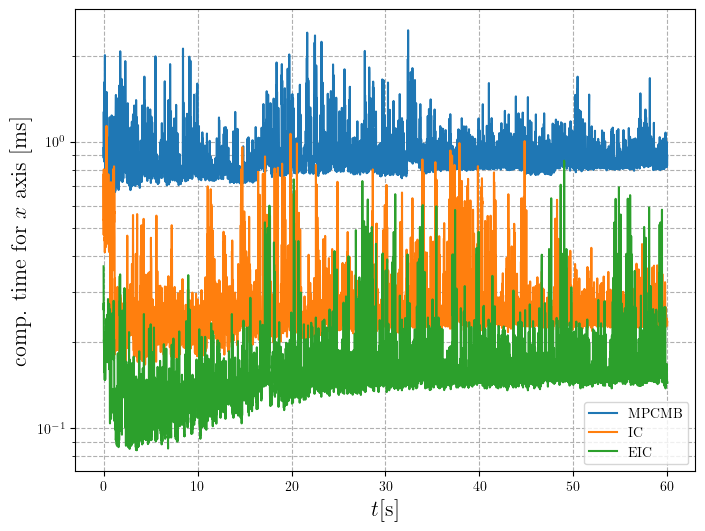

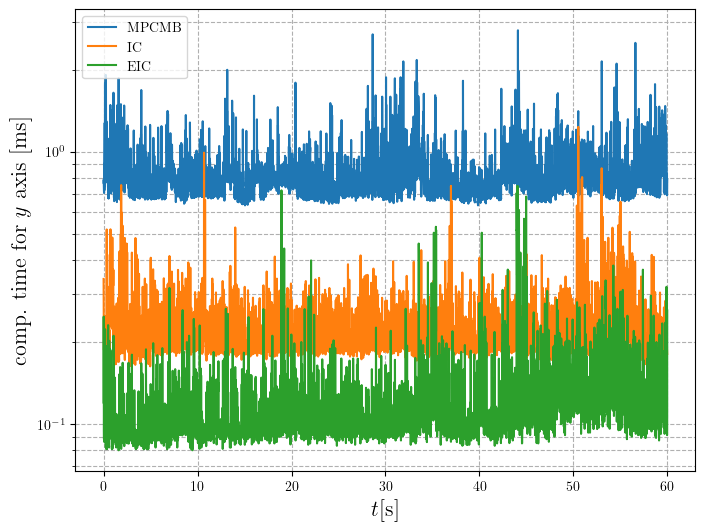

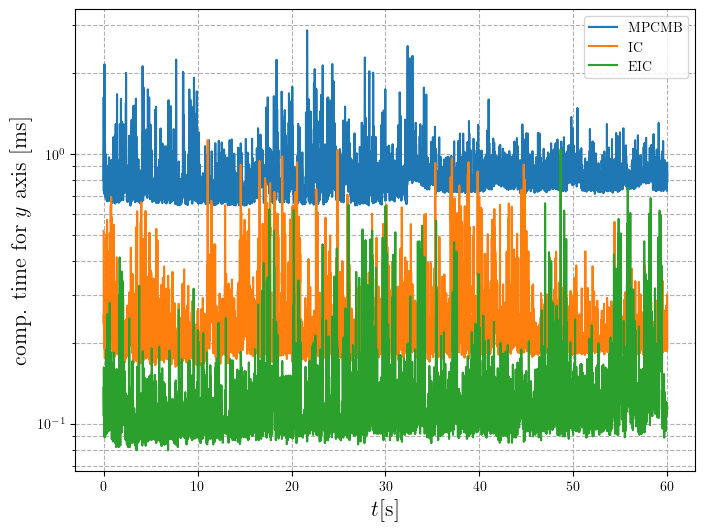

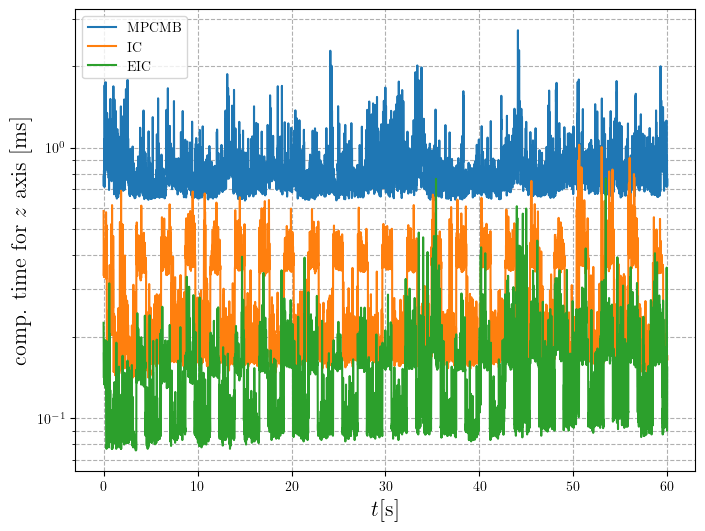

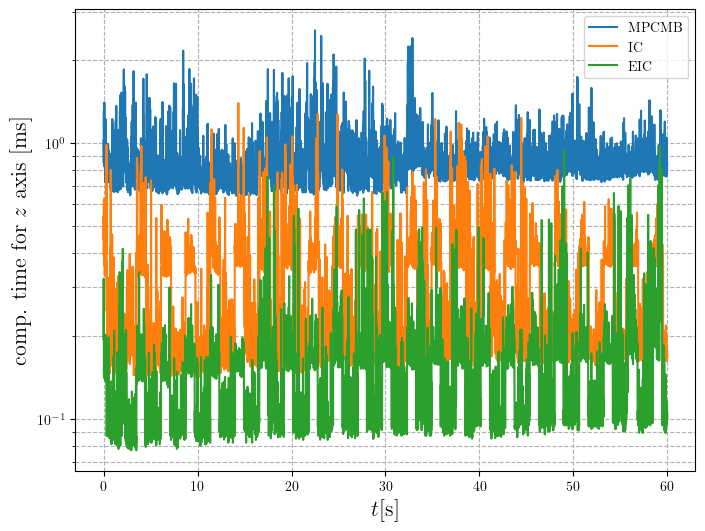

In [44]:
controllers_time = ['eic','ic','mpcmb'] # to draw in correct order because of overlapping
names = ['x','y','z']
for i, name in enumerate(names):
    for trajectory in trajectories:
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.figure(figsize=(8, 6))
        for controller in reversed(controllers_time):
            plt.plot(time, data[trajectory][controller][4][i,:]*1e3, label=controller.upper())
        plt.yscale('log')
        plt.grid(True, which="both", linestyle='--')
        plt.xlabel(r'$t\mathrm{[s]}$', fontsize=16)
        plt.ylabel(r'comp. time for $'+name+'$ axis $\mathrm{[ms]}$', fontsize=16)
        if save_plots:
            save_plot(folder_results+'plots/time_'+name+'_'+trajectory)
        else:
            plt.legend()
            plt.show()

#### Sum of both periods

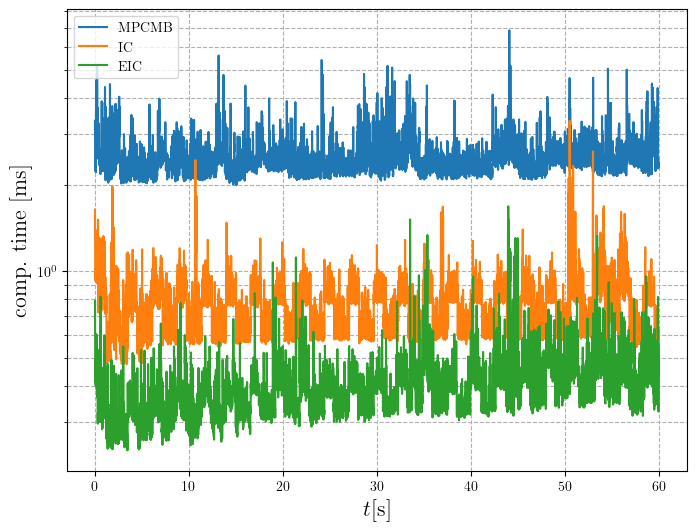

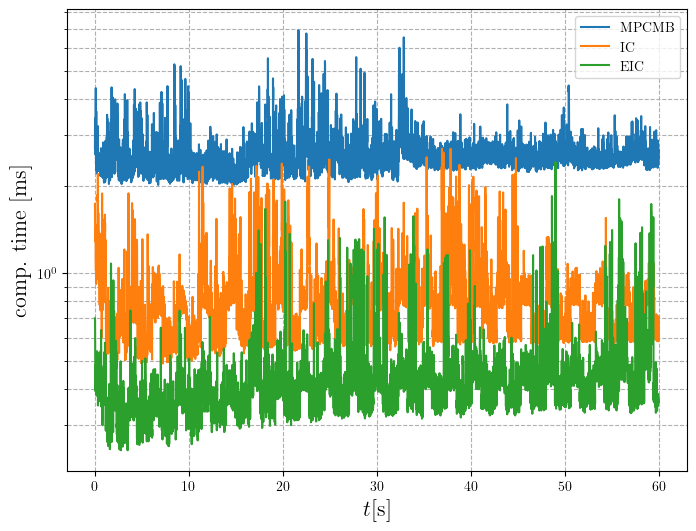

In [45]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    for controller in reversed(controllers_time):
        plt.plot(time, np.sum(data[trajectory][controller][4][:,:], 0)*1e3, label=controller.upper())
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=16)
    plt.ylabel(r'comp. time [ms]', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/time_sum_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Time needed for control cascade to acquire control action

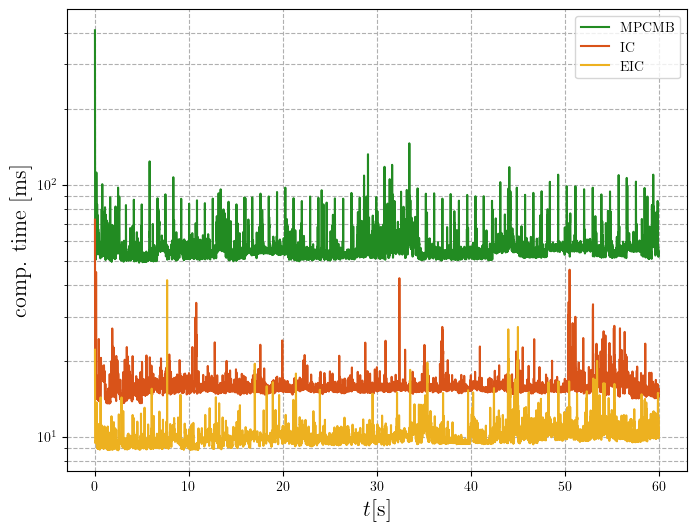

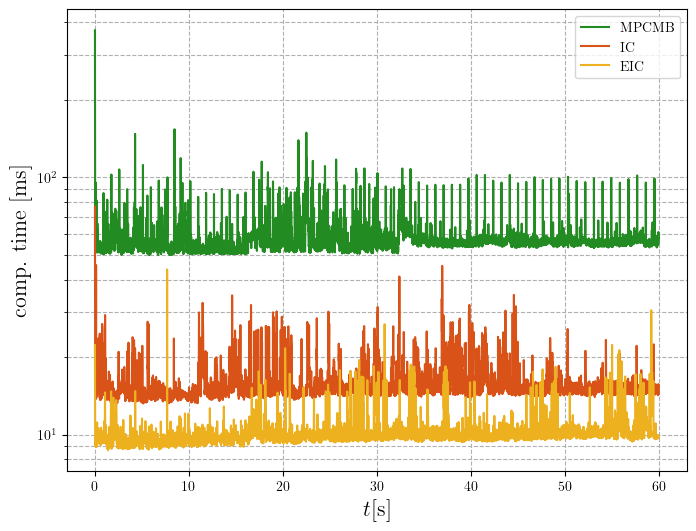

In [6]:
controllers_time = ['mpcmb','ic','eic'] # to draw in correct order because of overlapping

names = ['y','z']
for trajectory in trajectories:
    colors = [(0.133333333,0.545098039,0.133333333),(0.85000,0.32500,0.09800),(0.92900,0.69400,0.12500)]
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    for controller, color in zip(controllers_time,colors):
        plt.plot(time, dt_data[trajectory][controller]*1e3, label=controller.upper(), color = color)
    plt.yscale('log')
    plt.grid(True, which="both", linestyle='--')
    plt.xlabel(r'$t$[s]', fontsize=16)
    plt.ylabel(r'comp. time [ms]', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/time_full_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Interpolating coefficient

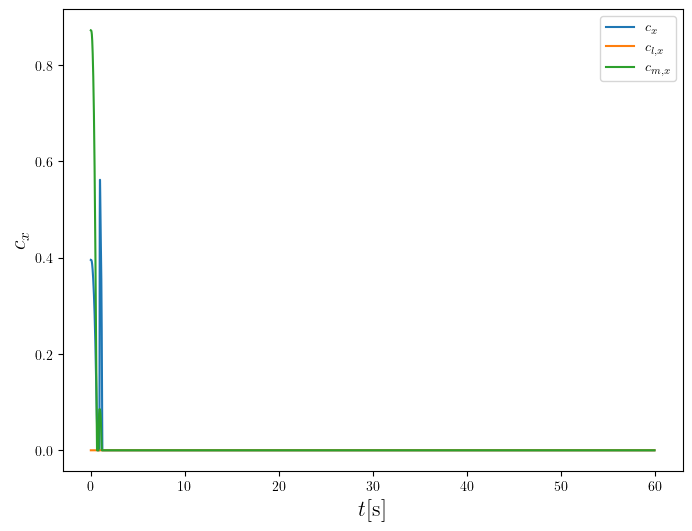

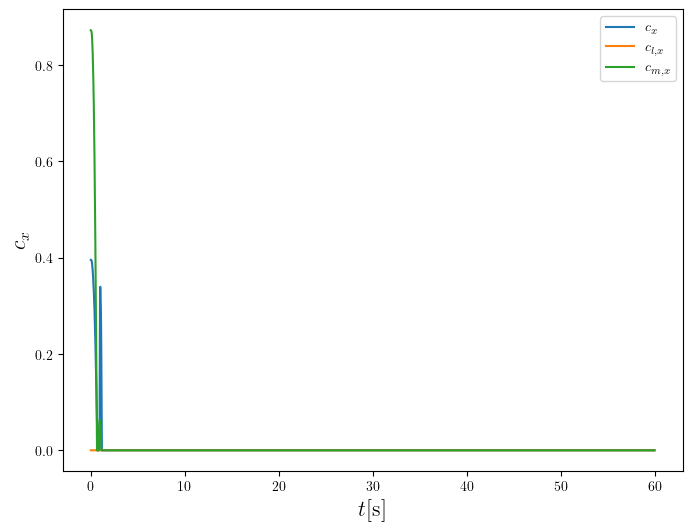

In [47]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    plt.plot(time, data[trajectory][controllers[0]][3][0, :], label=r'$c_x$')
    plt.plot(time, data[trajectory][controllers[1]][3][0, 0, :], label=r'$c_{l,x}$')
    plt.plot(time, data[trajectory][controllers[1]][3][1, 0, :], label=r'$c_{m,x}$')
    plt.xlabel(r'$t$[s]', fontsize=16)
    plt.ylabel(r'$c_x$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/c_x_'+trajectory)
    else:
        plt.legend()
        plt.show()

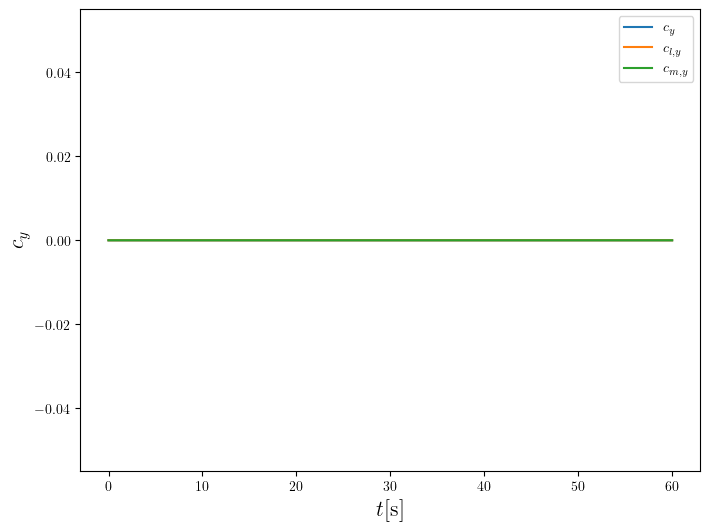

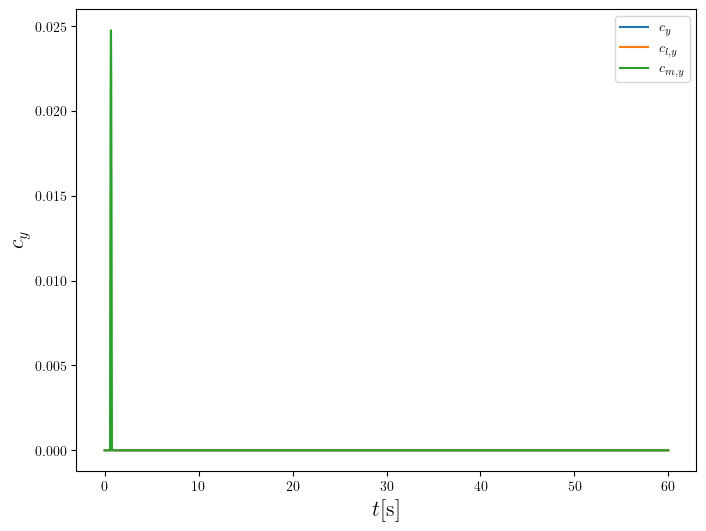

In [48]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    plt.plot(time, data[trajectory][controllers[0]][3][1, :], label=r'$c_y$')
    plt.plot(time, data[trajectory][controllers[1]][3][0, 1, :], label=r'$c_{l,y}$')
    plt.plot(time, data[trajectory][controllers[1]][3][1, 1, :], label=r'$c_{m,y}$')
    plt.xlabel(r'$t$[s]', fontsize=16)
    plt.ylabel(r'$c_y$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/c_y_'+trajectory)
    else:
        plt.legend()
        plt.show()

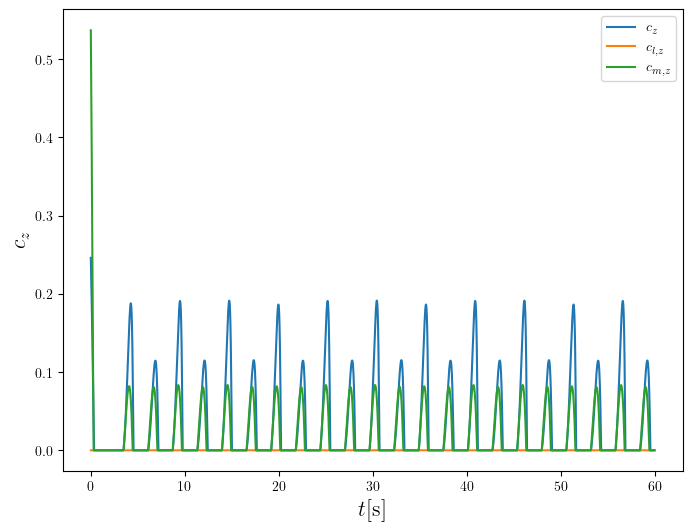

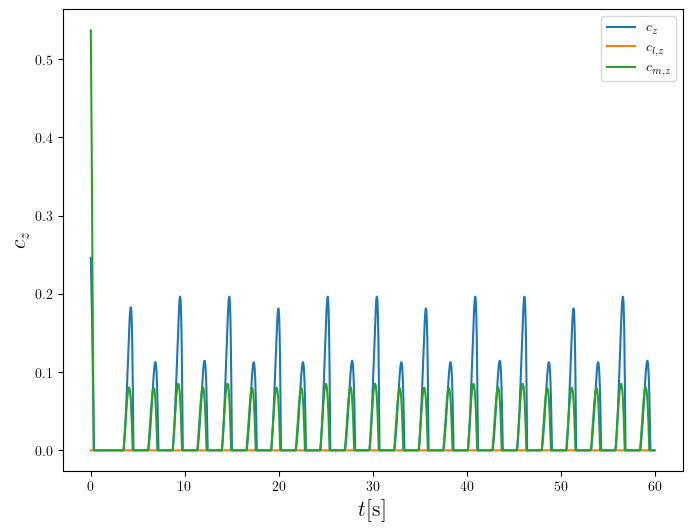

In [49]:
# plot with reference trajectory
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    plt.plot(time, data[trajectory][controllers[0]][3][2, :], label=r'$c_z$')
    plt.plot(time, data[trajectory][controllers[1]][3][0, 2, :], label=r'$c_{l,z}$')
    plt.plot(time, data[trajectory][controllers[1]][3][1, 2, :], label=r'$c_{m,z}$')
    plt.xlabel(r'$t$[s]', fontsize=16)
    plt.ylabel(r'$c_z$', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/c_z_'+trajectory)
    else:
        plt.legend()
        plt.show()

### Value of criterion from MPCs

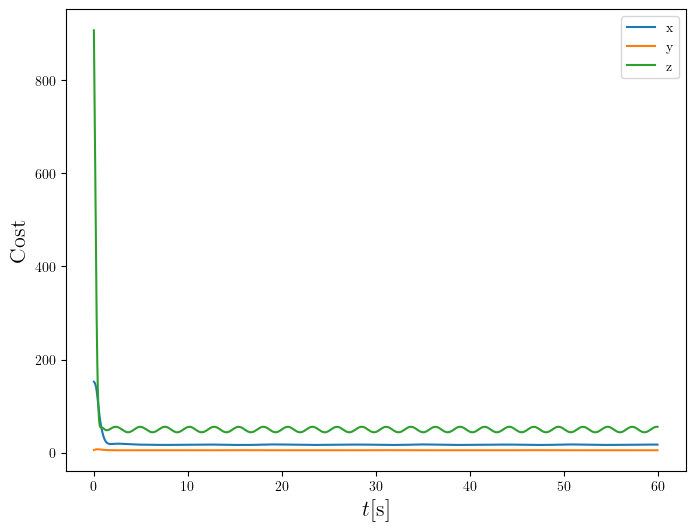

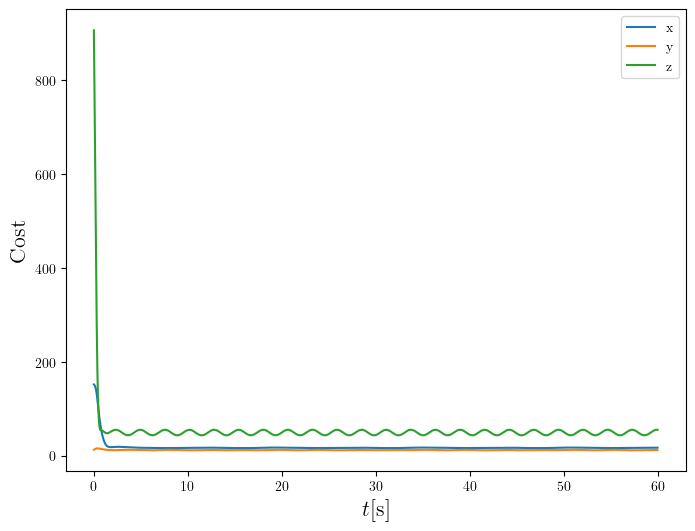

In [50]:
for trajectory in trajectories:
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    plt.plot(time, data[trajectory][controllers[2]]
             [3][0, :], label=r'x')
    plt.plot(time, data[trajectory][controllers[2]]
             [3][1, :], label=r'y')
    plt.plot(time, data[trajectory][controllers[2]]
             [3][2, :], label=r'z')
    plt.xlabel(r'$t$[s]', fontsize=16)
    plt.ylabel(r'Cost', fontsize=16)
    if save_plots:
        save_plot(folder_results+'plots/mpc_cost_'+trajectory)
    else:
        plt.legend()
        plt.show()

# Optimality, Integral Square Error, and Energy Consumption

In [53]:
nx = data[trajectory][controller][0].shape[1]
Q = np.zeros((nx,nx))
for i, model in enumerate(models):
    Q[i,i] = model.Q_h[0,0]
    Q[i+nx//2,i+nx//2] = model.Q_h[1,1]
    
nu = data[trajectory][controller][2].shape[0]
R = np.zeros((nu,nu))
for i, model in enumerate(models):
    R[i,i] = model.R_h

def eval_crit(state, control, Q, R):
    return state@Q@state.T + control@R@control.T

def signif(x, p):
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

def perc(x,l):
    return (x/l)*100-100

n = 3
nperc = 2
def eval_table(dict):
    df = pd.DataFrame.from_dict(dict)
    for trajectory in trajectories:
        df[trajectory] = df[trajectory].apply(lambda x: signif(x, n))
        df[trajectory + ' perc.'] = df[trajectory].apply(lambda x: perc(x,df.loc['mpcmb'].at[trajectory]))
        df[trajectory + ' perc.'] = df[trajectory + ' perc.'].apply(lambda x: np.round(x, nperc))
    return df


def multipar_dict_to_df(nested_dict):
    reformed_dict = {}
    for outerKey, innerDict in nested_dict.items():
        for innerKey, values in innerDict.items():
            reformed_dict[(outerKey,
                        innerKey)] = values
        return pd.DataFrame(reformed_dict)

err = {}
ise = {}
total_ise = {}
total_energy = {}
energy_cons = {}
total_time = {}
max_time = {}
mean_time = {}
std_time = {}
crit = {}
for trajectory in trajectories:
    for controller in controllers:
        err_temp = []
        crit_temp = []
        for i, model in enumerate(models):
            err_temp.append(data[trajectory][controller][1][i,:] - data[trajectory][controller][0][0,i,:])
        err.setdefault(trajectory, {})[controller] = np.array(err_temp)
        ise_temp = model.dt*np.sum((err[trajectory][controller][:,:]**2), 1)
        ise.setdefault(trajectory, {})[controller] =  np.hstack((ise_temp, np.sum(ise_temp)))
        energy_temp = model.dt*np.sum((data[trajectory][controller][2][:,:]**2), 1)
        energy_cons.setdefault(trajectory, {})[controller] = np.hstack((energy_temp, np.sum(energy_temp)))
        total_time_temp = np.sum(data[trajectory][controller][4],1)
        total_time.setdefault(trajectory, {})[controller] = np.hstack((total_time_temp, np.sum(total_time_temp)))
        mean_time_temp = np.mean(data[trajectory][controller][4]*1e3,1)
        mean_time.setdefault(trajectory, {})[controller] = np.hstack((mean_time_temp, np.mean(mean_time_temp)))
        std_time_temp = np.std(data[trajectory][controller][4]*1e3,1)
        std_time.setdefault(trajectory, {})[controller] = np.hstack((std_time_temp, np.std(std_time_temp)))
        max_time_temp = np.max(data[trajectory][controller][4]*1e3,1)
        max_time.setdefault(trajectory, {})[controller] = np.hstack((max_time_temp, np.max(max_time_temp)))
        total_ise.setdefault(trajectory, {})[controller] =  np.sum(ise_temp)
        total_energy.setdefault(trajectory, {})[controller] =  np.sum(energy_temp)
        crit.setdefault(trajectory, {})[controller] = np.sum(np.fromiter((eval_crit(data[trajectory][controller][1][:,k]-data[trajectory][controller][0][0,:,k], data[trajectory][controller][2][:,k], Q, R) for k in range(Nsim)), float))
    

### Criterion of optimality

Angle and angular rate in state vector are not reflected in criterion value as well as the torque, because they are manipulated by attitude controller.

In [54]:
df_crit = eval_table(crit)
df_crit[trajectories] = df_crit[trajectories].astype(int)
df_crit

,spiral,figure8,spiral perc.,figure8 perc.
ic,3120,3250,11.43,10.92
eic,2870,3010,2.50,2.73
mpcmb,2800,2930,0.00,0.00


### ISE

for each controller and sum

In [55]:
df_ise = eval_table(ise)
df_total_ise = eval_table(total_ise)
df_ise

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[2.19, 0.00813, 0.264, 2.46]","[2.2, 0.0202, 0.262, 2.48]","[-29.13, -95.85, 22.22, -29.71]","[-29.03, -96.6, 21.3, -36.57]"
eic,"[2.1, 0.00828, 0.227, 2.33]","[2.11, 0.0207, 0.226, 2.36]","[-32.04, -95.78, 5.09, -33.43]","[-31.94, -96.52, 4.63, -39.64]"
mpcmb,"[3.09, 0.196, 0.216, 3.5]","[3.1, 0.594, 0.216, 3.91]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### Energy consumption

for each controller and sum

In [56]:
df_energy = eval_table(energy_cons)
df_total_energy = eval_table(total_energy)
df_energy

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[33.6, 3.91, 58.3, 95.9]","[33.3, 14.2, 58.9, 106.0]","[162.5, 169.66, 3.19, 35.64]","[160.16, 94.25, 4.25, 38.2]"
eic,"[38.9, 4.33, 55.8, 99.0]","[37.7, 15.1, 56.3, 109.0]","[203.91, 198.62, -1.24, 40.03]","[194.53, 106.57, -0.35, 42.11]"
mpcmb,"[12.8, 1.45, 56.5, 70.7]","[12.8, 7.31, 56.5, 76.7]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### Merged table

In [57]:
def get_crit_table(df, original_names, new_name):
    df_merged = []
    for i, original_name in enumerate(original_names):
        df_merged.append(df.filter(regex=original_name, axis=1).copy())
        df_merged[-1].rename(columns = {original_name: new_name, original_name + ' perc.': new_name+' %'}, inplace = True)
        
    return df_merged
df_merged_crit = get_crit_table(df_crit, trajectories, 'J')
df_merged_ise = get_crit_table(df_total_ise, trajectories, 'ISE')
df_merged_energy = get_crit_table(df_total_energy, trajectories, 'E')

df_merged_crit, df_merged_ise, df_merged_energy

([          J    J %
  ic     3120  11.43
  eic    2870   2.50
  mpcmb  2800   0.00,
            J    J %
  ic     3250  10.92
  eic    3010   2.73
  mpcmb  2930   0.00],
 [        ISE  ISE %
  ic     2.46 -29.71
  eic    2.33 -33.43
  mpcmb  3.50   0.00,
          ISE  ISE %
  ic     2.48 -36.57
  eic    2.36 -39.64
  mpcmb  3.91   0.00],
 [          E    E %
  ic     95.9  35.64
  eic    99.0  40.03
  mpcmb  70.7   0.00,
             E    E %
  ic     106.0  38.20
  eic    109.0  42.11
  mpcmb   76.7   0.00])

In [58]:
def merge_tables(list_of_tables):
    dfs_merged = []
    for i, trajectory in enumerate(trajectories):
        merge = list_of_tables[0][i].copy()
        for j in range(1,len(list_of_tables)):
            merge = pd.merge(merge, list_of_tables[j][i], left_index=True, right_index=True,how='outer')
        dfs_merged.append(merge)
    return dfs_merged

dfs_merged = merge_tables([df_merged_crit, df_merged_ise, df_merged_energy])
dfs_merged

[          J    J %   ISE  ISE %     E    E %
 ic     3120  11.43  2.46 -29.71  95.9  35.64
 eic    2870   2.50  2.33 -33.43  99.0  40.03
 mpcmb  2800   0.00  3.50   0.00  70.7   0.00,
           J    J %   ISE  ISE %      E    E %
 ic     3250  10.92  2.48 -36.57  106.0  38.20
 eic    3010   2.73  2.36 -39.64  109.0  42.11
 mpcmb  2930   0.00  3.91   0.00   76.7   0.00]

In [59]:
for df, trajectory in zip(dfs_merged, trajectories):
    buf = folder_results+"table_crit_3d_pybullet_"+trajectory+".tex"
    caption = "Evaluation of the criterion, ISE, and energy consumption for the MPC, MPCMB IC, and eIC for the tracking of "+trajectory+" reference trajectory in simulator"
    label = "tab:comparison-crit-pybullet-"+trajectory+""
    column_format = "lrrrr"
    s = df.style
    s.format({
        ("J %"): '{:,.2f}',
        ("ISE %"): '{:,.2f}',
        ("ISE"): '{:,.2f}',
        ("E %"): '{:,.2f}',
        ("E"): '{:,.2f}',
        }, precision=4)
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)

### Total time for solving the LPs/QPs

for each controller and sum

In [60]:
df_time_total = eval_table(total_time)
df_time_total

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[1.54, 1.31, 1.64, 4.49]","[1.6, 1.4, 1.76, 4.75]","[-70.16, -73.05, -66.26, -69.87]","[-69.75, -71.72, -65.22, -68.95]"
eic,"[0.899, 0.69, 0.807, 2.4]","[0.952, 0.731, 0.855, 2.54]","[-82.58, -85.8, -83.4, -83.89]","[-82.0, -85.23, -83.1, -83.4]"
mpcmb,"[5.16, 4.86, 4.86, 14.9]","[5.29, 4.95, 5.06, 15.3]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### MAX Period for solving the LPs/QPs

for each controller and global max in [ms]

In [61]:
df_time_max = eval_table(max_time)
df_time_max

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[1.37, 1.23, 1.02, 1.37]","[1.14, 1.13, 1.4, 1.4]","[-46.48, -55.91, -62.36, -50.9]","[-53.47, -60.76, -45.53, -51.39]"
eic,"[0.762, 0.749, 0.771, 0.771]","[0.86, 1.04, 0.977, 1.04]","[-70.23, -73.15, -71.55, -72.37]","[-64.9, -63.89, -61.98, -63.89]"
mpcmb,"[2.56, 2.79, 2.71, 2.79]","[2.45, 2.88, 2.57, 2.88]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### Mean Period for solving the LPs/QPs

for each controller and global mean in [ms]

In [62]:
df_time_mean = eval_table(mean_time)
df_time_mean

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.257, 0.218, 0.273, 0.249]","[0.266, 0.233, 0.293, 0.264]","[-70.08, -73.09, -66.25, -69.85]","[-69.84, -71.79, -65.24, -68.94]"
eic,"[0.15, 0.115, 0.134, 0.133]","[0.159, 0.122, 0.143, 0.141]","[-82.54, -85.8, -83.44, -83.9]","[-81.97, -85.23, -83.04, -83.41]"
mpcmb,"[0.859, 0.81, 0.809, 0.826]","[0.882, 0.826, 0.843, 0.85]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### STD Period for solving the LPs/QPs

for each controller and global STD in [ms]

In [63]:
df_time_std = eval_table(std_time)
df_time_std

,spiral,figure8,spiral perc.,figure8 perc.
ic,"[0.0641, 0.059, 0.118, 0.0266]","[0.0899, 0.0889, 0.147, 0.0273]","[-56.39, -63.8, -27.16, 276.77]","[-44.16, -49.49, -13.02, 320.65]"
eic,"[0.0408, 0.0434, 0.0567, 0.00696]","[0.0556, 0.0567, 0.0729, 0.00789]","[-72.24, -73.37, -65.0, -1.42]","[-65.47, -67.78, -56.86, 21.57]"
mpcmb,"[0.147, 0.163, 0.162, 0.00706]","[0.161, 0.176, 0.169, 0.00649]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


### Period evaluation for whole cascade

In [64]:
df_dt = multipar_dict_to_df(dt_data)
print("max dt [ms]:")
print(df_dt.max()*1e3)
print("mean dt [ms]:")
print(df_dt.mean()*1e3)
print("std dt [ms]:")
print(df_dt.std()*1e3)
print("sum dt [s]:")
print(df_dt.sum())

max dt [ms]:
spiral  ic        72.591305
        eic       41.795969
        mpcmb    408.756495
dtype: float64
mean dt [ms]:
spiral  ic       15.874166
        eic      10.113334
        mpcmb    56.176699
dtype: float64
std dt [ms]:
spiral  ic       1.797523
        eic      1.163116
        mpcmb    8.409350
dtype: float64
sum dt [s]:
spiral  ic        95.244999
        eic       60.680005
        mpcmb    337.060196
dtype: float64


In [65]:
def print_statictics(df):
    print("max dt [ms]:")
    print(df.max()*1e3)
    print("mean dt [ms]:")
    print(df.mean()*1e3)
    print("std dt [ms]:")
    print(df.std()*1e3)
    print("sum dt [s]:")
    print(df.sum())
    
def get_time_eval(df):
    df_eval = pd.DataFrame()
    df_eval['t [s]'] = df.sum().round().astype(int)
    df_eval['t %'] = df_eval.apply(lambda x: perc(x,df_eval.loc['mpcmb'].at['t [s]'])).round(nperc)
    df_eval['t_max [ms]'] = df_dt_figure8.max()*1e3
    df_eval['t_max [ms]'] = df_eval['t_max [ms]'].round().astype(int)
    df_eval['t_max %'] = df_eval['t_max [ms]'].apply(lambda x: perc(x,df_eval.loc['mpcmb'].at['t_max [ms]'])).round(nperc)
    return df_eval

df_dt_figure8 = pd.DataFrame.from_dict(dt_data['figure8'])
df_dt_spiral = pd.DataFrame.from_dict(dt_data['spiral'])
df_dt_stat = []
df_dt_stat.append(get_time_eval(df_dt_spiral))
df_dt_stat.append(get_time_eval(df_dt_figure8))


In [66]:
df_dt_stat[0]

,t [s],t %,t_max [ms],t_max %
ic,95,-71.81,77,-79.36
eic,61,-81.90,44,-88.20
mpcmb,337,0.00,373,0.00


In [67]:
df_dt_stat[1]

,t [s],t %,t_max [ms],t_max %
ic,95,-72.38,77,-79.36
eic,61,-82.27,44,-88.20
mpcmb,344,0.00,373,0.00


In [68]:
for df, trajectory in zip(df_dt_stat, trajectories):
    buf = folder_results+"table_time_3d_pybullet_"+trajectory+".tex"
    caption = "The time demands for IC, eIC, MPC and MPCMB for the tracking of "+trajectory+" reference trajectory in simulator"
    label = "tab:comparison-time-pybullet-"+trajectory
    column_format = "lrrrr"
    s = df.style
    s.format({
        ("t %"): '{:,.2f}',
        ("t_max %"): '{:,.2f}'
        })
    # form = [None, '${:,.2f}'.format, None, '${:,.2f}'.format]
    s.to_latex(buf = buf, caption = caption, label = label, column_format = column_format, hrules=True)

In [69]:
print("spiral:")
print_statictics(df_dt_spiral)

spiral:
max dt [ms]:
ic        72.591305
eic       41.795969
mpcmb    408.756495
dtype: float64
mean dt [ms]:
ic       15.874166
eic      10.113334
mpcmb    56.176699
dtype: float64
std dt [ms]:
ic       1.797523
eic      1.163116
mpcmb    8.409350
dtype: float64
sum dt [s]:
ic        95.244999
eic       60.680005
mpcmb    337.060196
dtype: float64


In [70]:
print("figure8:")
print_statictics(df_dt_figure8)

figure8:
max dt [ms]:
ic        76.861858
eic       43.838024
mpcmb    372.802734
dtype: float64
mean dt [ms]:
ic       15.774118
eic      10.171968
mpcmb    57.377728
dtype: float64
std dt [ms]:
ic       2.700982
eic      1.429062
mpcmb    9.005363
dtype: float64
sum dt [s]:
ic        94.644710
eic       61.031808
mpcmb    344.266368
dtype: float64
